In [1]:
from PIL import Image
from io import BytesIO
from boto3 import client
import boto3
import time
import random
import json
import os
import pandas as pd
import random

from image_process_tools import *
import requests as req
import numpy as np
import gist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import distance_metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import metrics


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
area = 'Boston-Massachusetts-US/'
bucket_name = "chen-gal-test"
imagepath = "https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/"+area
imagepath

'https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/'

In [4]:
prefix = "AirbnbImages/"+area
s3 = boto3.resource('s3')
bucket = s3.Bucket(name=bucket_name)
images_valid = list(bucket.objects.filter(Prefix=prefix))

In [5]:
filenames = []
apt_list = []
full_filenames = []
counter = 0
features = []

In [ ]:
for obj in images_valid[1:]:
    print("Processing image {} of {}\n ,{}..................".format(counter,len(images_valid),obj.key))
    string = obj.key.split('/')  
#     try:
    apt_list.append(string[-1].split('_')[-2])
    filenames.append(string[-1])
    full_path_name = 'https://s3-us-west-2.amazonaws.com/'+bucket_name+'/'+ str(obj.key)
    full_filenames.append(full_path_name)   
    
    response = req.get(full_path_name)
    im = np.array(Image.open(BytesIO(response.content)))
    features.append(gist.extract(im))
    counter += 1
#     except:
#         print('Error at img {}'.format(obj.key))
#         continue
        
    if counter % 5000 == 0:
        df_dict = {'filename':filenames,'apt':apt_list,'full_filename':full_filenames,\
                   'features':features}
        image_df = pd.DataFrame(df_dict)
        feature_folder = '../'+'image/'+ area + '/'
        if not os.path.exists(feature_folder):
            os.makedirs(feature_folder)        
        filename = feature_folder + 'featureture_'+str(counter)+'.csv'
        image_df.to_csv(filename)
        filenames,apt_list,full_filenames,features = [],[],[],[]
             
df_dict = {'filename':filenames,'apt':apt_list,'full_filename':full_filenames,\
                   'features':features}
image_df = pd.DataFrame(df_dict)
filename = feature_folder + 'featureture_'+str(counter)+'.csv'
image_df.to_csv(filename)

Processing image 0 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_0.jpg..................
Processing image 1 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_1.jpg..................
Processing image 2 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_10.jpg..................
Processing image 3 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_11.jpg..................
Processing image 4 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_12.jpg..................
Processing image 5 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_13.jpg..................
Processing image 6 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_14.jpg..................
Processing image 7 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_15.jpg..................
Processing image 8 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_16.jpg..................
Processing image 9 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10004575_17.jpg...........

Processing image 81 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_11.jpg..................
Processing image 82 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_12.jpg..................
Processing image 83 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_13.jpg..................
Processing image 84 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_14.jpg..................
Processing image 85 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_15.jpg..................
Processing image 86 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_16.jpg..................
Processing image 87 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_17.jpg..................
Processing image 88 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_18.jpg..................
Processing image 89 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_19.jpg..................
Processing image 90 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10033715_2.jpg

Processing image 162 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_15.jpg..................
Processing image 163 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_16.jpg..................
Processing image 164 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_17.jpg..................
Processing image 165 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_18.jpg..................
Processing image 166 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_19.jpg..................
Processing image 167 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_2.jpg..................
Processing image 168 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_20.jpg..................
Processing image 169 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_21.jpg..................
Processing image 170 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034183_22.jpg..................
Processing image 171 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10034

Processing image 242 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10035581_9.jpg..................
Processing image 243 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10036192_0.jpg..................
Processing image 244 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10036192_1.jpg..................
Processing image 245 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10036192_10.jpg..................
Processing image 246 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10036192_11.jpg..................
Processing image 247 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10036192_12.jpg..................
Processing image 248 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10036192_13.jpg..................
Processing image 249 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10036192_14.jpg..................
Processing image 250 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10036192_15.jpg..................
Processing image 251 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1003619

Processing image 323 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10059572_2.jpg..................
Processing image 324 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10059572_3.jpg..................
Processing image 325 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10059572_4.jpg..................
Processing image 326 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10059572_5.jpg..................
Processing image 327 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10059572_6.jpg..................
Processing image 328 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10059572_7.jpg..................
Processing image 329 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10059572_8.jpg..................
Processing image 330 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10059572_9.jpg..................
Processing image 331 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10068240_0.jpg..................
Processing image 332 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/10068240_1.jp

Processing image 404 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_25.jpg..................
Processing image 405 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_26.jpg..................
Processing image 406 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_27.jpg..................
Processing image 407 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_28.jpg..................
Processing image 408 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_29.jpg..................
Processing image 409 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_3.jpg..................
Processing image 410 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_4.jpg..................
Processing image 411 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_5.jpg..................
Processing image 412 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_6.jpg..................
Processing image 413 of 58281
 ,AirbnbImages/Boston-Massachusetts-US/1009275_7.jpg....

In [5]:
feature_root_path = 'https://s3-us-west-2.amazonaws.com/chen-gal-test/'

In [6]:
x = s3_list_files(bucket_name,'features/Boston-Massachusetts-US/',2)
pd_clean = x.drop(x[x[1]==''].index,axis=0)

In [7]:
files = pd_clean['full_name'].values

In [8]:
df_merged = []

In [9]:
for f_csv in files:
    tmp_df = pd.read_csv(feature_root_path+f_csv)
    df_merged.append(tmp_df)

In [10]:
combined_features = pd.concat(df_merged)

In [11]:
combined_features.to_excel('../features/Boston-Massachusetts-US/Boston_all.xlsx')

In [15]:
combined_features.head()

,Unnamed: 0,apt,features,filename,full_filename
0,0,12419766,[0.06903291 0.1303951 0.21851343 0.14819324 0...,12419766_0.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
1,1,12419766,[0.14714348 0.13745567 0.13900706 0.148272 0...,12419766_1.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
2,2,12419766,[0.21123357 0.20801397 0.19352317 0.17369384 0...,12419766_10.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
3,3,12419766,[0.17163146 0.17779368 0.20724472 0.19003874 0...,12419766_11.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
4,4,12419766,[0.18949167 0.19316888 0.2009032 0.24142252 0...,12419766_12.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...


## load in features from s3

In [16]:
features_cf = pd.read_excel("https://s3-us-west-2.amazonaws.com/chen-gal-test/features/Boston-Massachusetts-US/Boston_all.xlsx")

In [22]:
features_cf.head()

,Unnamed: 0,apt,features,filename,full_filename
0,0,12419766,[0.06903291 0.1303951 0.21851343 0.14819324 0...,12419766_0.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
1,1,12419766,[0.14714348 0.13745567 0.13900706 0.148272 0...,12419766_1.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
2,2,12419766,[0.21123357 0.20801397 0.19352317 0.17369384 0...,12419766_10.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
3,3,12419766,[0.17163146 0.17779368 0.20724472 0.19003874 0...,12419766_11.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
4,4,12419766,[0.18949167 0.19316888 0.2009032 0.24142252 0...,12419766_12.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...


In [79]:
features = features_cf['features'].values

In [85]:
count = 0
for x in features:
    while(count <=5):
        print(x)
        print('-----------\n')
        count += 1

[0.06903291 0.1303951  0.21851343 0.14819324 0.07865781 0.13104533
 0.1938613  0.13302262 0.06977639 0.12575227 0.17428404 0.11668132
 0.07046626 0.13205484 0.1943947  0.1248387  0.06534761 0.0902474
 0.15031178 0.11766639 0.06057153 0.09038469 0.10300724 0.0883237
 0.06052535 0.06996044 0.08945933 0.08182088 0.07207777 0.08441966
 0.13272682 0.09932068 0.06052697 0.08214693 0.1447834  0.13146143
 0.0677755  0.08897435 0.14533837 0.1287495  0.0673934  0.08957841
 0.15475942 0.1315995  0.06328779 0.08025159 0.14458625 0.13462523
 0.11542071 0.11464743 0.13258533 0.135978   0.13427842 0.14126833
 0.15334839 0.12968925 0.13745035 0.15654188 0.179577   0.15322503
 0.12129086 0.13089742 0.15571776 0.15695618 0.05770772 0.07186393
 0.08577365 0.07505627 0.054614   0.07965016 0.10987277 0.0660606
 0.05931608 0.08508313 0.11889242 0.10005067 0.06908781 0.06686056
 0.09920482 0.10549398 0.07531893 0.09631535 0.12283772 0.096577
 0.07967966 0.0854856  0.12811814 0.09317546 0.07303078 0.0941265
 

In [31]:
tmp = [x for x in features[1].split(' ') if x != '']

In [40]:
tmp = [x.strip('\n') for x in tmp]
tmp = [x.strip('[') for x in tmp]
tmp = [x.strip(']') for x in tmp]
tmp = [float(x) for x in tmp]

In [7]:
def clean_feature_data(string):
    try:
        tmp = [x for x in string.split(' ') if x != '']
        tmp = [x.strip('\n') for x in tmp]
        tmp = [x.strip('[') for x in tmp]
        tmp = [x.strip(']') for x in tmp]
        tmp = [float(x) for x in tmp if x != '']
    except:
        print(tmp)
        return False        
    return tmp

In [11]:
def load_features(path):
    features_cf = pd.read_excel(path)
    features = features_cf['features'].values
    cleaned_feature = []
    for i,x in enumerate(features):
        tmp_cleaned = clean_feature_data(x)
        if not tmp_cleaned:
            break
        else:
            assert(len(tmp_cleaned)==960)            
            cleaned_feature.append(np.array(tmp_cleaned))
    assert(len(cleaned_feature) == len(features_cf))
    features_cf.drop('features',axis = 1) 
    features_cf['features'] = cleaned_feature
    return features_cf

In [12]:
feature_path = "https://s3-us-west-2.amazonaws.com/chen-gal-test/features/Boston-Massachusetts-US/Boston_all.xlsx"
df = load_features(feature_path)

In [15]:
df.head()

,Unnamed: 0,apt,features,filename,full_filename
0,0,12419766,"[0.06903291, 0.1303951, 0.21851343, 0.14819324...",12419766_0.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
1,1,12419766,"[0.14714348, 0.13745567, 0.13900706, 0.148272,...",12419766_1.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
2,2,12419766,"[0.21123357, 0.20801397, 0.19352317, 0.1736938...",12419766_10.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
3,3,12419766,"[0.17163146, 0.17779368, 0.20724472, 0.1900387...",12419766_11.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
4,4,12419766,"[0.18949167, 0.19316888, 0.2009032, 0.24142252...",12419766_12.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...


In [39]:
feature_matrix = df[1]

In [43]:
np.savetxt("feature_matrix.txt",feature_matrix)

In [318]:
%%time
z3 = np.loadtxt('feature_matrix_float32.txt')

CPU times: user 52.9 s, sys: 1.61 s, total: 54.5 s
Wall time: 54.8 s


In [25]:
m = cosine_similarity(t,z)

In [284]:
%pdb off

Automatic pdb calling has been turned OFF


In [299]:
z2 = z.astype(np.float32)

In [304]:
np.savetxt("feature_matrix_float32.txt",z2)

In [305]:
sys.getsizeof(z2)

223795312

In [322]:
df1 = df.drop('features',axis = 1)

In [331]:
df.columns

Index(['Unnamed: 0', 'apt', 'features', 'filename', 'full_filename'], dtype='object')

In [339]:
import hashlib

In [353]:
filename_for_esemble = df['filename'].values
full_filename_for_esemble = df['full_filename'].values
apt_id = df['apt']

In [351]:
pd.DataFrame(filename_for_esemble.reshape(1,-1),full_filename_for_esemble.reshape(1,-1),z)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

TypeError: unhashable type: 'numpy.ndarray'

In [354]:
dict_1 = {'full_file_name':full_filename_for_esemble,'apt_id':apt_id,\
          'short_file_name': filename_for_esemble,}

In [375]:
columns1 = list(range(960))
df_2 = pd.DataFrame(z2,columns = columns1)

In [399]:
z = list(apt_id)

In [401]:
len(z)

58280

In [408]:
df_2.to_pickle('../features/Boston-Massachusetts-US/Boston_all.pickle')

In [409]:
%%time
dfdf = pd.read_pickle('../features/Boston-Massachusetts-US/Boston_all.pickle')

CPU times: user 28 ms, sys: 144 ms, total: 172 ms
Wall time: 173 ms


In [412]:
len(dfdf)

58280

In [402]:
df_2['full_file_name'] = full_filename_for_esemble
df_2['apt_id_1'] = z
df_2['short_file_name'] = filename_for_esemble

In [414]:
pd3 = dfdf[list(range(960))].values

In [418]:
pd3

array([[0.06903291, 0.1303951 , 0.21851343, ..., 0.05265902, 0.05397722,
        0.05485399],
       [0.14714348, 0.13745567, 0.13900706, ..., 0.03147732, 0.0356852 ,
        0.03724395],
       [0.21123357, 0.20801397, 0.19352317, ..., 0.01509769, 0.01554893,
        0.01350953],
       ...,
       [0.17177247, 0.13617721, 0.1029537 , ..., 0.05898891, 0.06227867,
        0.06542829],
       [0.2072567 , 0.21784554, 0.21248746, ..., 0.05384256, 0.0588843 ,
        0.06524314],
       [0.1103422 , 0.11781709, 0.12450313, ..., 0.03846945, 0.03912739,
        0.03857694]], dtype=float32)

In [93]:
full_filename = df.full_filename.values

apt_id = df.apt.values

In [30]:
def load_features(path):
    features_cf = pd.read_excel(path)
    features = features_cf['features'].values
    cleaned_feature = []

    assert(len(cleaned_feature) == len(features_cf))
    feature_cf.drop('features',axis = 1)   
    feature_cf['features'] = cleaned_feature
    return feature_cf
        
    

[0.14714348,
 0.13745567,
 0.13900706,
 0.148272,
 0.1276573,
 0.13226189,
 0.14588395,
 0.14040919,
 0.1199716,
 0.11884819,
 0.13702337,
 0.13784559,
 0.13727313,
 0.12952374,
 0.14203505,
 0.15284322,
 0.07952943,
 0.07535767,
 0.07466276,
 0.08273532,
 0.06200283,
 0.07490177,
 0.08275264,
 0.08131341,
 0.06776796,
 0.07029565,
 0.07858734,
 0.07119262,
 0.07754727,
 0.06555688,
 0.07524882,
 0.08277577,
 0.06285126,
 0.066812,
 0.06851761,
 0.06714722,
 0.0550684,
 0.06169034,
 0.0655556,
 0.06156377,
 0.05528346,
 0.06110919,
 0.06743617,
 0.06087729,
 0.05950026,
 0.06002237,
 0.06336682,
 0.06587037,
 0.09609445,
 0.10415693,
 0.10409427,
 0.10851978,
 0.0918109,
 0.10021427,
 0.10604398,
 0.09417491,
 0.08615299,
 0.09873906,
 0.11618772,
 0.10393658,
 0.09345696,
 0.09670459,
 0.10807638,
 0.10203418,
 0.21969691,
 0.21965197,
 0.22413754,
 0.25494215,
 0.20688885,
 0.22054799,
 0.23071268,
 0.2125529,
 0.19951582,
 0.21197444,
 0.26624674,
 0.24517931,
 0.20908013,
 0.197073

In [273]:

def find_closest_img(featureX,features_matrix,mask = {}, n_selected = 20):
    '''
    Function: find top *n_selected* of apts based on image similarities
    Input:
        featureX: <array> an image feature
        feature_matrix: database image features
        n_selected: number of similar images
        mask: <set> customized image indice that need to be filtered out 
    Output:
        index:<int> index of images that are selected
    '''
   
    distance_vector = cosine_similarity(featureX,features_matrix)#can change to other similarity measurements
    percentile = [99,95,90,85,80,75,70,1]
    for perc in percentile:
        threshold = np.percentile(distance_vector,perc)
        # times 10 to make sure that there would be enough candidate images
        if len(np.argwhere(distance_vector > threshold)) > 10* n_selected:            
            break            
    index_filtered = np.argwhere(distance_vector > threshold)
    current_mask_len = len(mask)
    rounds = 10
    while(rounds > 0):
        candidate_small = distance_vector[index_filtered[:,0],index_filtered[:,1]]
        top_similar = np.argsort(candidate_small)[::-1][0:n_selected+len(mask)]
        current_selected_index = [x for x in index_filtered[top_similar][:,1] \
                                  if x not in mask]
        assert(len(current_selected_index) == n_selected)
        current_feature_matrix = features_matrix[current_selected_index]
        validation_dist = cosine_similarity(current_feature_matrix)
#         print('current_feature_matrix_shape is {}'.format(current_feature_matrix.shape))
        duplicated_index_tmp = np.argwhere(validation_dist > 0.9999)
        duplicated_index = duplicated_index_tmp[np.argwhere(duplicated_index_tmp[:,0]\
                                                    <duplicated_index_tmp[:,1])[:,0]][:,1]
#         print(duplicated_index_tmp)
#         print(duplicated_index)
        if len(duplicated_index) == 0:
            break
            
        if len(mask) == 0:
            mask = set(np.array(current_selected_index)[duplicated_index])
        else:
            mask.update(np.array(current_selected_index)[duplicated_index])
        rounds -= 1
        
    return current_selected_index,mask

In [117]:
def similar_imshow(imgList,imgName = None, num_of_cols = 4):
    '''
    Function: show images in the list
    Input:
        imgList: <list[string]> image paths
        num_of_cols = 4: 
    '''
    nums_for_display = len(imgList)    
    pl.figure(figsize = (num_of_cols*5,int(np.ceil(nums_for_display//num_of_cols*5))))
    if imgName is None:
        imgName = [x.split('/')[-1].strip('.jpg') for x in imgList]
    for i in range(nums_for_display): 
        response = req.get(imgList[i])
        img = Image.open(BytesIO(response.content))
        
        pl.subplot(int(np.ceil(nums_for_display//num_of_cols)),num_of_cols,i+1,title\
                   = imgName[i])                   
        
        pl.axis('off')        
        pl.imshow(img)            
        
        
    
              

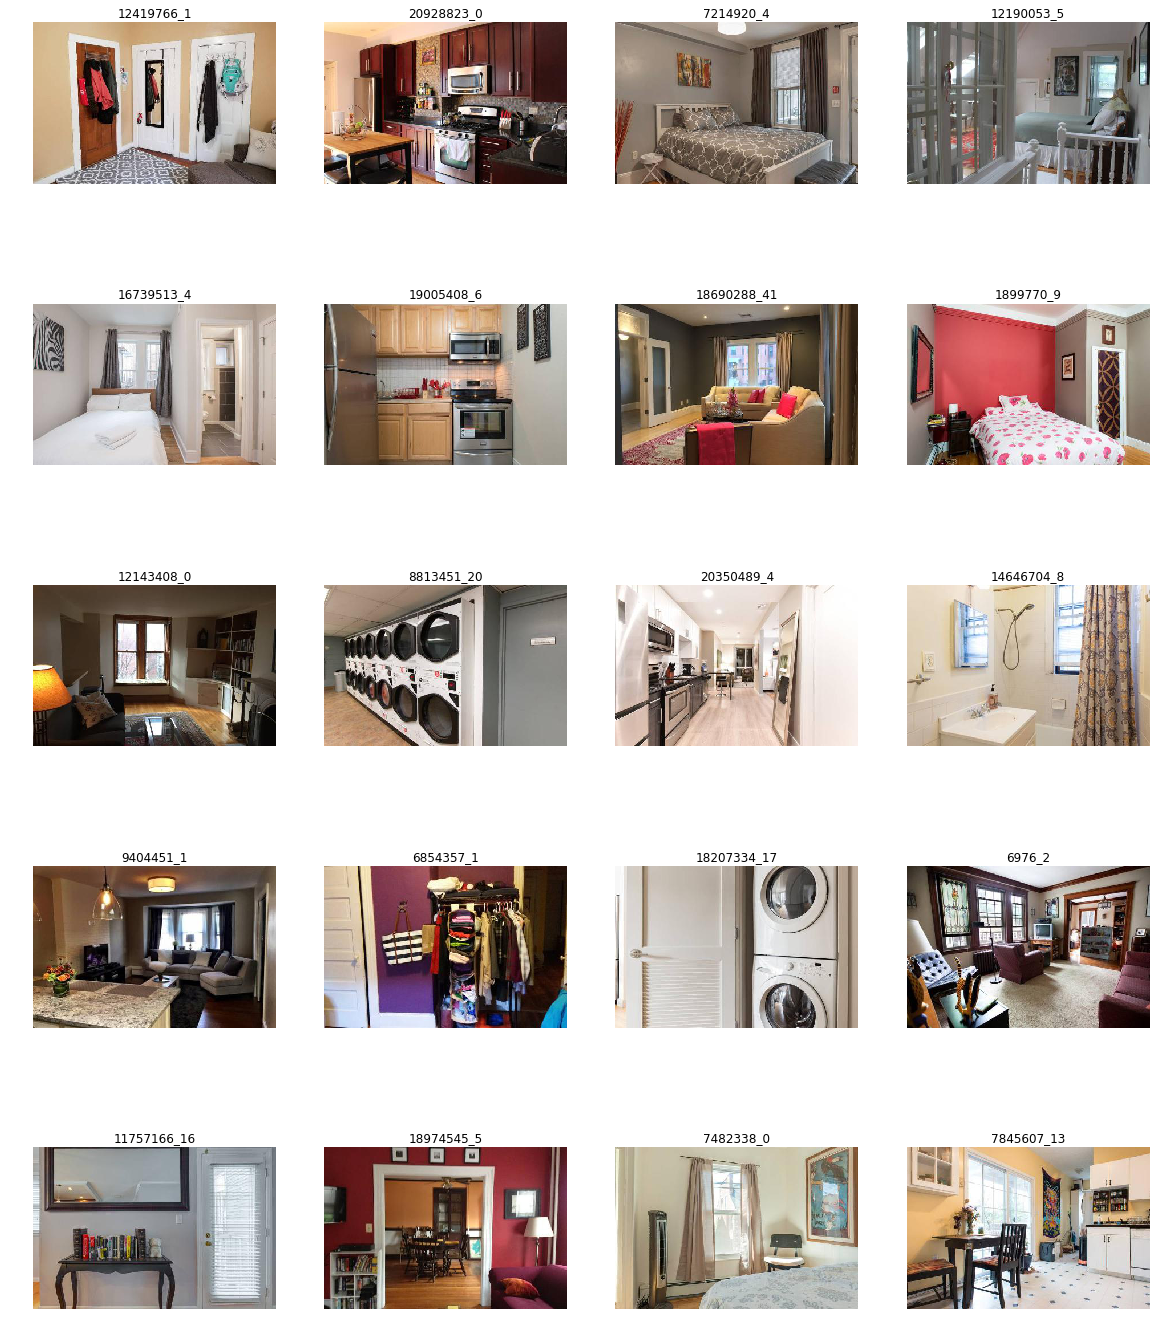

In [279]:
similar_imshow(selected_images)